In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import math
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import pandas as pd
import numpy as np

/Users/HPhuc/miniconda3/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [4]:
root_dir = ''

In [5]:
df=pd.read_csv('dji_2009-2019.csv', parse_dates=True)
print('Number of rows and columns:', df.shape)
length = df.shape[0]
df.head()

Number of rows and columns: (2767, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/09,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,1/5/09,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,1/6/09,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,1/7/09,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,1/8/09,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [6]:
seq_length = 30
step_length = 5

In [7]:
df['target_log'] = np.log(df['Close'].shift(-step_length) / df['Close'])

In [8]:
train_df = df[:int(length*0.6)].copy()
train_df.reset_index(inplace=True)
val_df = df[int(length*0.6):int(length*0.8)].copy()
val_df.reset_index(inplace=True)
test_df = df.loc[int(length*0.8):].copy()
test_df.reset_index(inplace=True)
train_df.shape, val_df.shape, test_df.shape

((1660, 9), (553, 9), (554, 9))

In [9]:
def create_candlebar(df, setname, draw_fnc):
    target = []
    filename = []
    if not os.path.exists(root_dir + 'data/charts/' + setname):
        os.makedirs(root_dir + 'data/charts/' + setname)
    for i in range(df.shape[0] - step_length - seq_length):
        print(i+1, end='\r')
        target.append(df.loc[i+seq_length-1, 'target_log'])
        slices = df[i: i+seq_length]
        draw_fnc(slices)

        plt.savefig(root_dir + 'data/charts/' + setname + '/candlebar_'\
                    + str(i) + '-' + str(i+seq_length-1) + '.png')
        filename.append('candlebar_' + str(i) + '-' + str(i+seq_length-1) + '.png')
        plt.close('all')

        #break
    pd.DataFrame({'filename': filename,
                  'target': target}).to_csv(root_dir + 'data/charts/' + setname + '_target.csv', index=False)


In [10]:
def draw_candlestick(df):
    #plot ohcl chart
    plt.figure(figsize=(1.12, 1.12), dpi=100)
    candlestick2_ohlc(plt.subplot(211), df['Open'].values, df['High'].values,
                    df['Low'].values, df['Close'].values, width=0.6,
                    colorup='b', colordown='r', alpha=1)
    plt.axis('off')

    plt.subplot(212)
    plt.bar(range(30), df['Volume'].values, color='g')
    plt.axis('off')
    plt.tight_layout()

def draw_line_chart(df):
    # TODO:
    plt.figure(figsize=(1.12, 1.12), dpi=100)
    
    plt.subplot(211)
    plt.plot(df['High'])
    plt.plot(df['Low'])
    
    plt.axis('off')

    plt.subplot(212)
    plt.bar(range(30), df['Volume'].values, color='g')
    plt.axis('off')
    plt.tight_layout()
    pass

def draw_hi_low_mid(df):
    # TODO:
    plt.figure(figsize=(1.12, 1.12), dpi=100)
    plt.subplot(211)

    aver_value = ((df['High'] - df['Low'])/2) + df['Low']
    plt.plot(df['High'], color='red')
    plt.plot(df['Low'], color='blue')
    plt.plot(aver_value)
    
    plt.axis('off')
    plt.subplot(212)
    plt.bar(range(30), df['Volume'].values, color='g')
    plt.axis('off')
    plt.tight_layout()
    pass


def draw_f_line_chart(df):
    
    plt.figure(figsize=(11.2, 11.2), dpi=10)
    ax=plt.subplot(211)

    aver_value = ((df['High'] - df['Low'])/2) + df['Low']
    y1=df['High']
    y2=df['Low']
    y3=aver_value
    
    ax.fill_between(range(30),y1, y3, where=y1 > y3, facecolor='red')
    ax.fill_between(range(30),y2, y3, where=y2 < y3, facecolor='blue')
    
    plt.axis('off')
    plt.subplot(212)
    plt.bar(range(30), df['Volume'].values, color='g')
    plt.axis('off')
    plt.tight_layout()
    

    pass

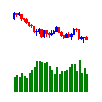

In [14]:
draw_candlestick(train_df[:30])

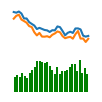

In [15]:
draw_line_chart(train_df[:30])

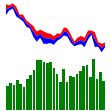

In [16]:
draw_f_line_chart(train_df[:30])

In [17]:
create_candlebar(train_df, 'candlestick', draw_fnc=draw_candlestick)

In [18]:
create_candlebar(train_df, 'linechart', draw_fnc=draw_line_chart)

In [19]:
create_candlebar(train_df, 'f_linechart', draw_fnc=draw_line_chart)